# Predicting Diamond Prices
## Phase 1: Data Preparation & Visualisation

#### Group Number: Group 57

#### Name(s) & ID(s) of Group Members: 
- Eddie Ton (s3948609)
- Jabbar Baloghlan (s3890406)
- Tyler Xia (s3945694)

## Table of Contents
* [Introduction](#Introduction) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)

## Introduction

### Dataset Source

The Diamond dataset used in study was sourced from Kaggle (Shivam Agrawal, 2021). This dataset contains various details and properties of diamonds based on the Tiffany & Co's snapshot pricelist from 2017.

### Dataset Details

The dataset contains information about the carat, size, quality, colour and the price of a diamond. It also includes information on the depth, the height of a diamond from the middle to its tip. The table, which is the largest surface area on the diamond which is commonly on the top. As well as, the width, length, and height of a diamond. 

This dataset has 10 features in total and 53941 observations. Diamonds with no price information or missing values have been removed from the dataset.

In [35]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###

In [36]:
# name of the dataset to be imported from our GitHub account
df_name = 'diamonds.csv'
df_url = 'https://raw.githubusercontent.com/Jobi060704/math_files/main/' + df_name
url_content = requests.get(df_url, verify=False).content
diamond_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [37]:
new_diamond_df = diamond_df.drop(columns=diamond_df.columns[0])
new_diamond_df.sample(10, random_state=99)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
42653,0.40,Premium,G,IF,60.8,58.0,1333,4.73,4.77,2.89
4069,0.31,Very Good,D,SI1,63.0,55.0,571,4.32,4.34,2.73
27580,1.60,Ideal,F,VS2,62.0,55.0,18421,7.49,7.54,4.66
33605,0.31,Good,D,SI2,63.1,54.0,462,4.33,4.38,2.75
34415,0.30,Ideal,G,IF,61.2,57.0,863,4.35,4.38,2.67
46932,0.52,Premium,G,VS1,62.4,60.0,1815,5.12,5.11,3.19
52243,0.80,Very Good,J,VS1,62.7,58.0,2487,5.91,5.95,3.72
38855,0.40,Ideal,G,VVS2,62.4,56.0,1050,4.74,4.72,2.95
38362,0.33,Ideal,D,VVS2,61.1,56.0,1021,4.46,4.44,2.72
20258,1.72,Ideal,J,SI1,62.0,57.0,8688,7.66,7.62,4.74


### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [38]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
        ['Carat','Numeric','Carat','Weight of the diamond'],
        ['Cut','Ordinal Categorical','NA','Quality of the cut:\
            \n- Fair\
            \n- Good\
            \n- Very Good\
            \n- Premium\
            \n- Ideal'],
        ['Color','Ordinal Categorical','NA','Diamond colour, from J (worst) to D (best)'],
        ['Clarity','Ordinal Categorical','NA','A measurement of the clarity of a diamond:\
            \n- I1 (worst)\
            \n- SI2\
            \n- SI1\
            \n- VS2\
            \n- VS1\
            \n- VVS2\
            \n- VVS1\
            \n- IF (best)'],
        ['Depth','Numeric','Percent','Total depth percentage = z / mean(x, y) = 2 * z / (x + y) '],
        ['Table','Numeric','Percent','Percentage of a diamonds average diameter\nof the top section relative to its total diameter'],
        ['Price','Numeric','USD','The price of the diamond'],
        ['X','Numeric','Millimeters','Length of a diamond'],
        ['Y','Numeric','Millimeters','Width of a diamond'],
        ['Z','Numeric','Millimeters','Depth of a diamond']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════════════════╤═════════════╤═══════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units       │ Description                                               │
╞═════════╪═════════════════════╪═════════════╪═══════════════════════════════════════════════════════════╡
│ Carat   │ Numeric             │ Carat       │ Weight of the diamond                                     │
├─────────┼─────────────────────┼─────────────┼───────────────────────────────────────────────────────────┤
│ Cut     │ Ordinal Categorical │ NA          │ Quality of the cut:                                       │
│         │                     │             │ - Fair                                                    │
│         │                     │             │ - Good                                                    │
│         │                     │             │ - Very Good                                               │
│         │                 

### Target Feature

For this project, the target feature in this dataset will be the diamond price in US dollars. That is, the price of diamonds will be predicted based on the explanatory/ descriptive variables. 

## Goals and Objectives

Diamonds have a very complex system to calculate the price. A model that could accurately predict/set diamond prices is a requirement to anyone purchasing or selling diamonds. For instance a store selling diamonds could use such a model to determine the price to sell the diamond at. And similarily, a jeweler could reapair and create appropriate designs for jewelry based on the diamond price and other realted features.

Therefore, the primary goal of this project is to accurately predict the price of a diamond based on its properties, as well as which feature has the most impact on determining the final price of the diamond.

## Data Cleaning and Preprocessing

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values 
*   Random sampling of the dataset for 5000 rows

#### Taking care of outliers and unusual observations

For numeric features based on the measurement of the real object of a diamond, the observation of the numeric features cannot be equal to zero or any negative values. Additionally, table and depth features must be greater than zero. Since, the features are a percentage between two positive variables.

The table below are a sample of the observations that fulfill these conditions. All 20 of the problematic observations have been dropped from the dataset.

In [39]:
no_outlier_df = new_diamond_df[(new_diamond_df['Carat'] > 0) & (new_diamond_df['Depth'] > 0) & (new_diamond_df['Table'] > 0) & (new_diamond_df['X'] > 0) & (new_diamond_df['Y'] > 0) & (new_diamond_df['Z'] > 0)]
no_outlier_df.sample(10, random_state=99)

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
49849,0.56,Ideal,D,VS1,62.6,59.0,2170,5.24,5.31,3.30
9905,1.11,Premium,H,VS1,62.3,57.0,4687,6.67,6.62,4.14
47696,0.52,Ideal,E,VS1,60.0,56.0,1883,5.25,5.29,3.16
11721,0.34,Ideal,E,SI1,61.8,56.0,596,4.45,4.48,2.76
22755,2.01,Fair,H,SI2,66.7,56.0,10772,7.80,7.76,5.19
29220,0.34,Ideal,I,IF,61.3,55.0,695,4.52,4.55,2.78
53886,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
6939,1.00,Fair,E,SI1,66.3,62.0,4140,6.27,6.06,4.09
48868,0.78,Very Good,J,SI1,59.4,62.0,2035,6.01,6.05,3.58
10061,0.35,Good,F,SI2,63.8,56.0,591,4.48,4.45,2.85


For categorical features, an outlier is defined as a value that doesn't fit the previously defined observations of a feature. There are no problematic observations. Thus, requires no changes to the dataset.

## Data Exploration and Visualisation

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation

#### Distribution Plot of Color

We count the Color gradients to see which color has the highest count in diamonds. As we can see in Figure 1, the I gradient is the most abundant variation compared to others.

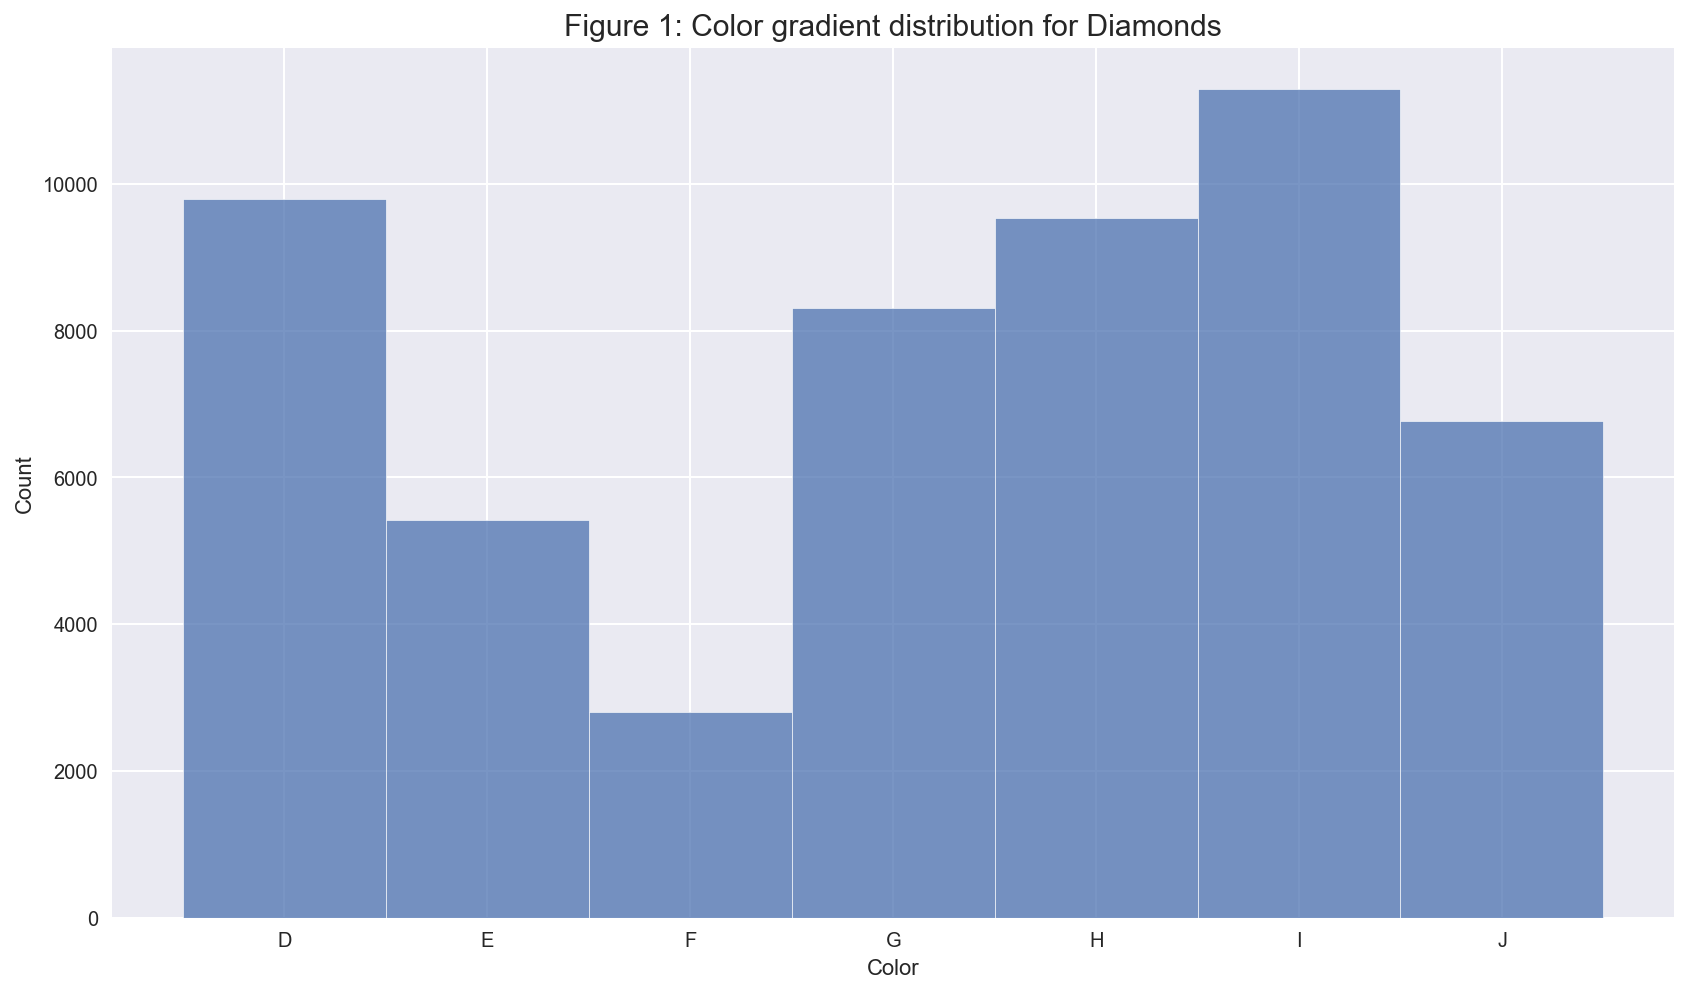

In [40]:
plt.figure(figsize = (14,8))
fig = sns.histplot(new_diamond_df['Color'], discrete=True)
fig.set_xticks(new_diamond_df['Color'].unique())
fig.set_xticklabels(['D','E','F','G','H','I','J'])
fig = plt.title('Figure 1: Color gradient distribution for Diamonds', fontsize = 15)
plt.show()

#### Distribution Plot of Cut

We count the Cut grades to see which cut has the highest count in diamonds. As we can see in Figure 1, the the 'Fair' cut grade is the most abundant variation compared to others.

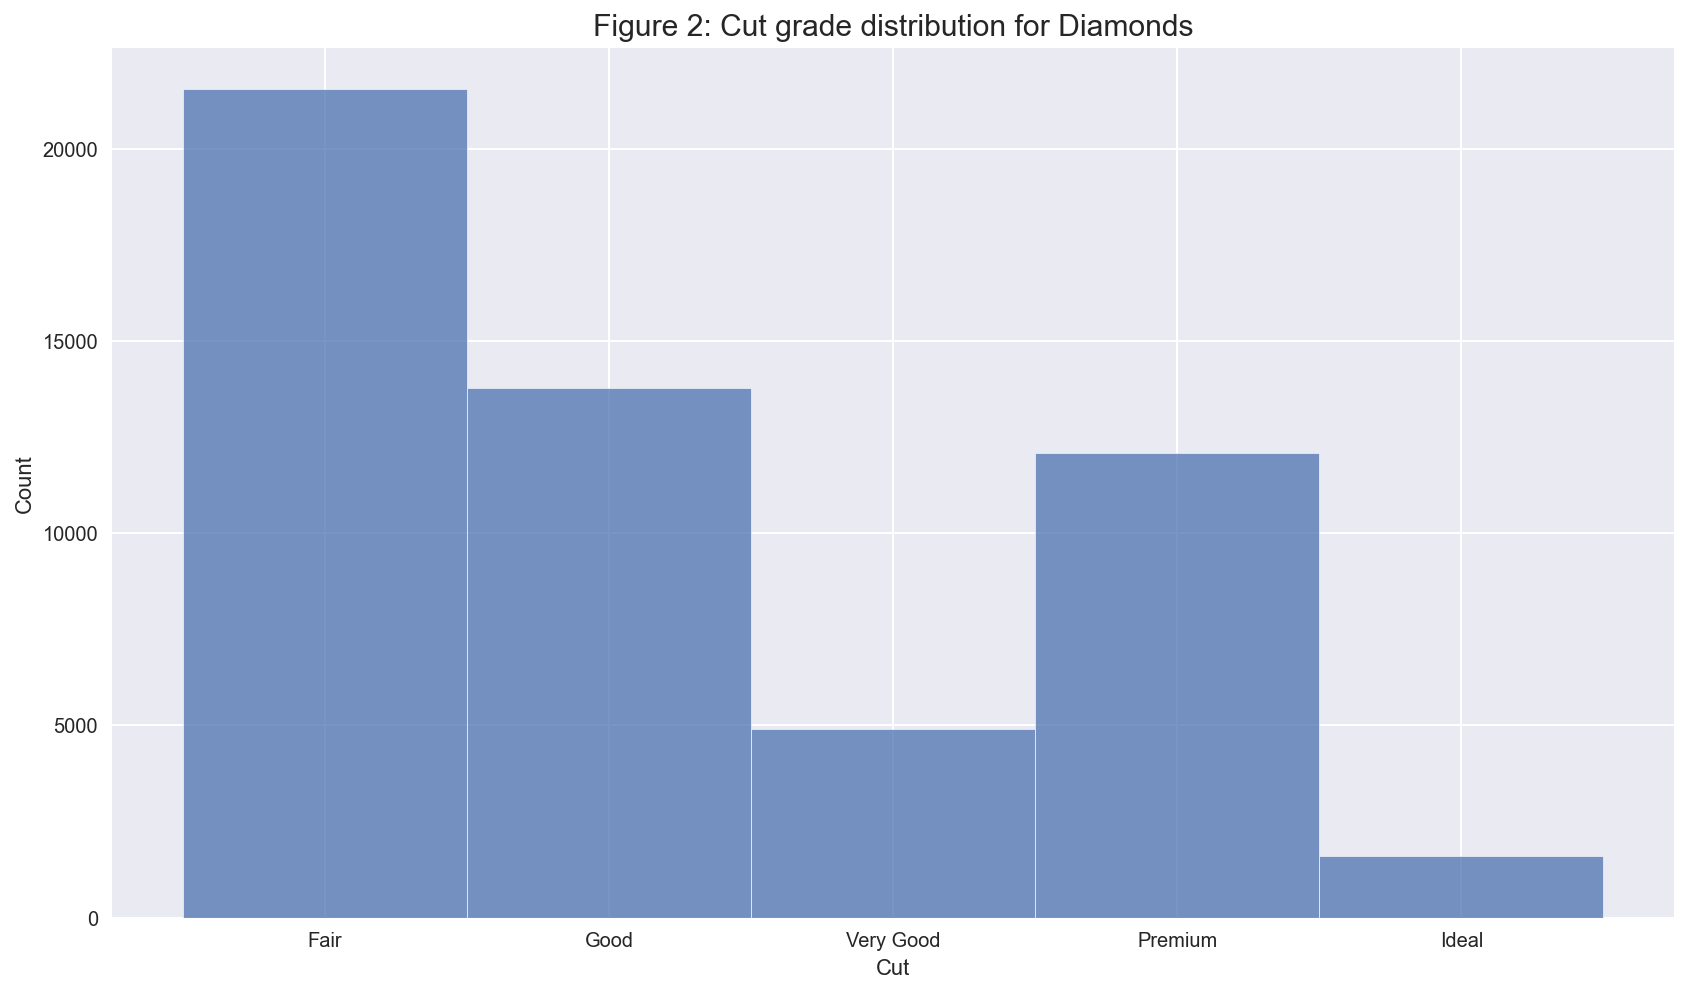

In [41]:
plt.figure(figsize = (14,8))
fig = sns.histplot(new_diamond_df['Cut'], discrete=True)
fig.set_xticks(new_diamond_df['Cut'].unique())
fig.set_xticklabels(['Fair','Good','Very Good','Premium','Ideal'])
fig = plt.title('Figure 2: Cut grade distribution for Diamonds', fontsize = 15)
plt.show()

#### Boxplot of Clarity

The boxplot demonstrates the deviation in Clarities in diamonds. From the results, we can get that Clarities of SI1, VS2, and VS1 are most common.

Boxplot legend:
- 1 -> I1 (worst)
- 2 -> SI2
- 3 -> SI1
- 4 -> VS2
- 5 -> VS1
- 6 -> VVS2
- 7 -> VVS1
- 8 -> IF (best)

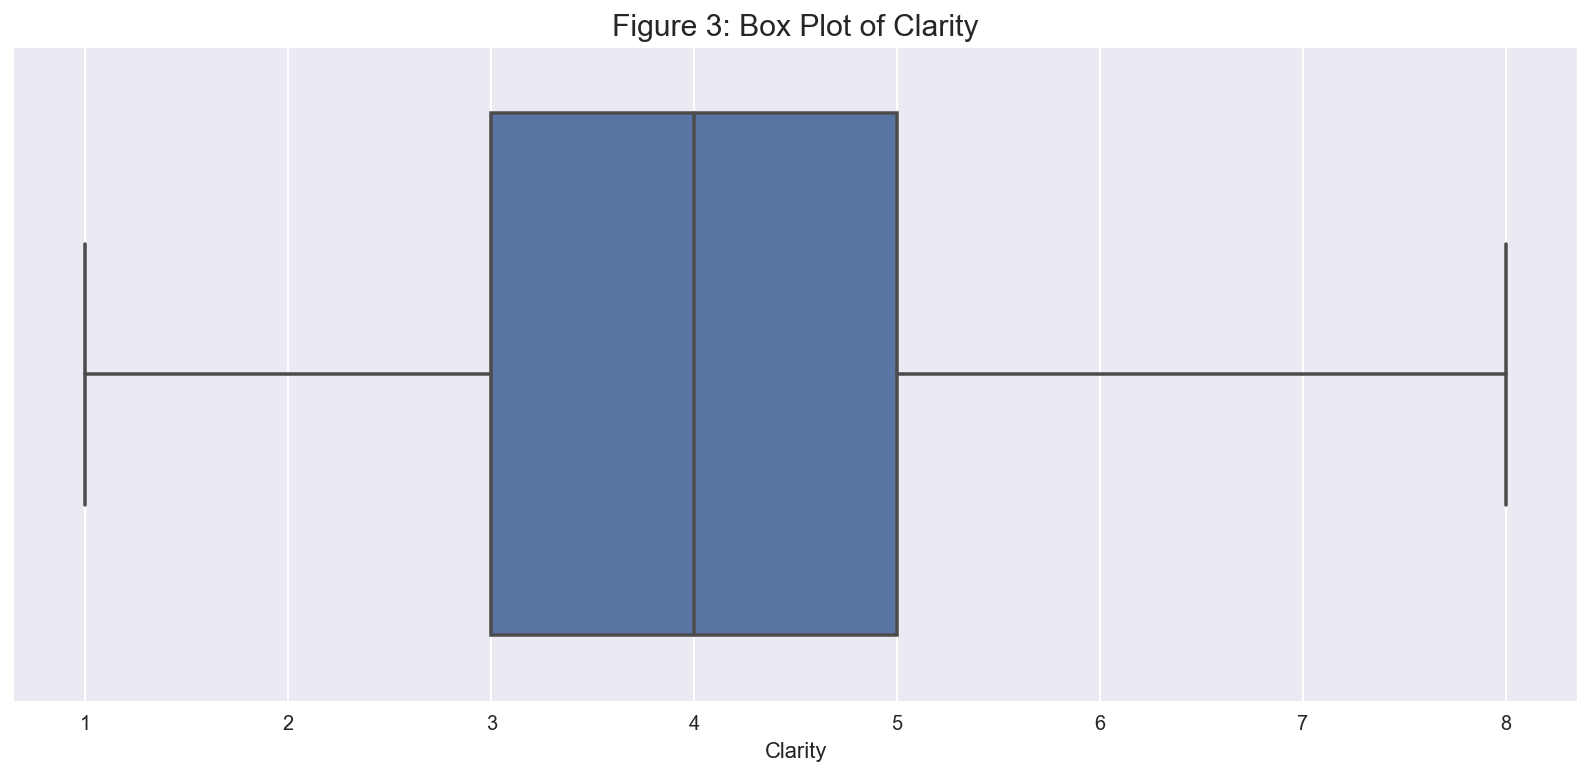

In [42]:
plt.figure(figsize = (14,6))
b1_df = new_diamond_df.copy()

b1_df.Clarity[b1_df.Clarity == 'I1'] = 1
b1_df.Clarity[b1_df.Clarity == 'SI2'] = 2
b1_df.Clarity[b1_df.Clarity == 'SI1'] = 3
b1_df.Clarity[b1_df.Clarity == 'VS2'] = 4
b1_df.Clarity[b1_df.Clarity == 'VS1'] = 5
b1_df.Clarity[b1_df.Clarity == 'VVS2'] = 6
b1_df.Clarity[b1_df.Clarity == 'VVS1'] = 7
b1_df.Clarity[b1_df.Clarity == 'IF'] = 8

fig = sns.boxplot(b1_df['Clarity']).set_title('Figure 3: Box Plot of Clarity', fontsize = 15)
plt.show()

### Two-Variable Visualisation

#### Boxplot of Clarity and price

The boxplot demonstrates the relevant price per clarity of a diamond. From the results, we can see that all variations are relatively same within IQR, and can be deemed to be able to change the price insignificantly.

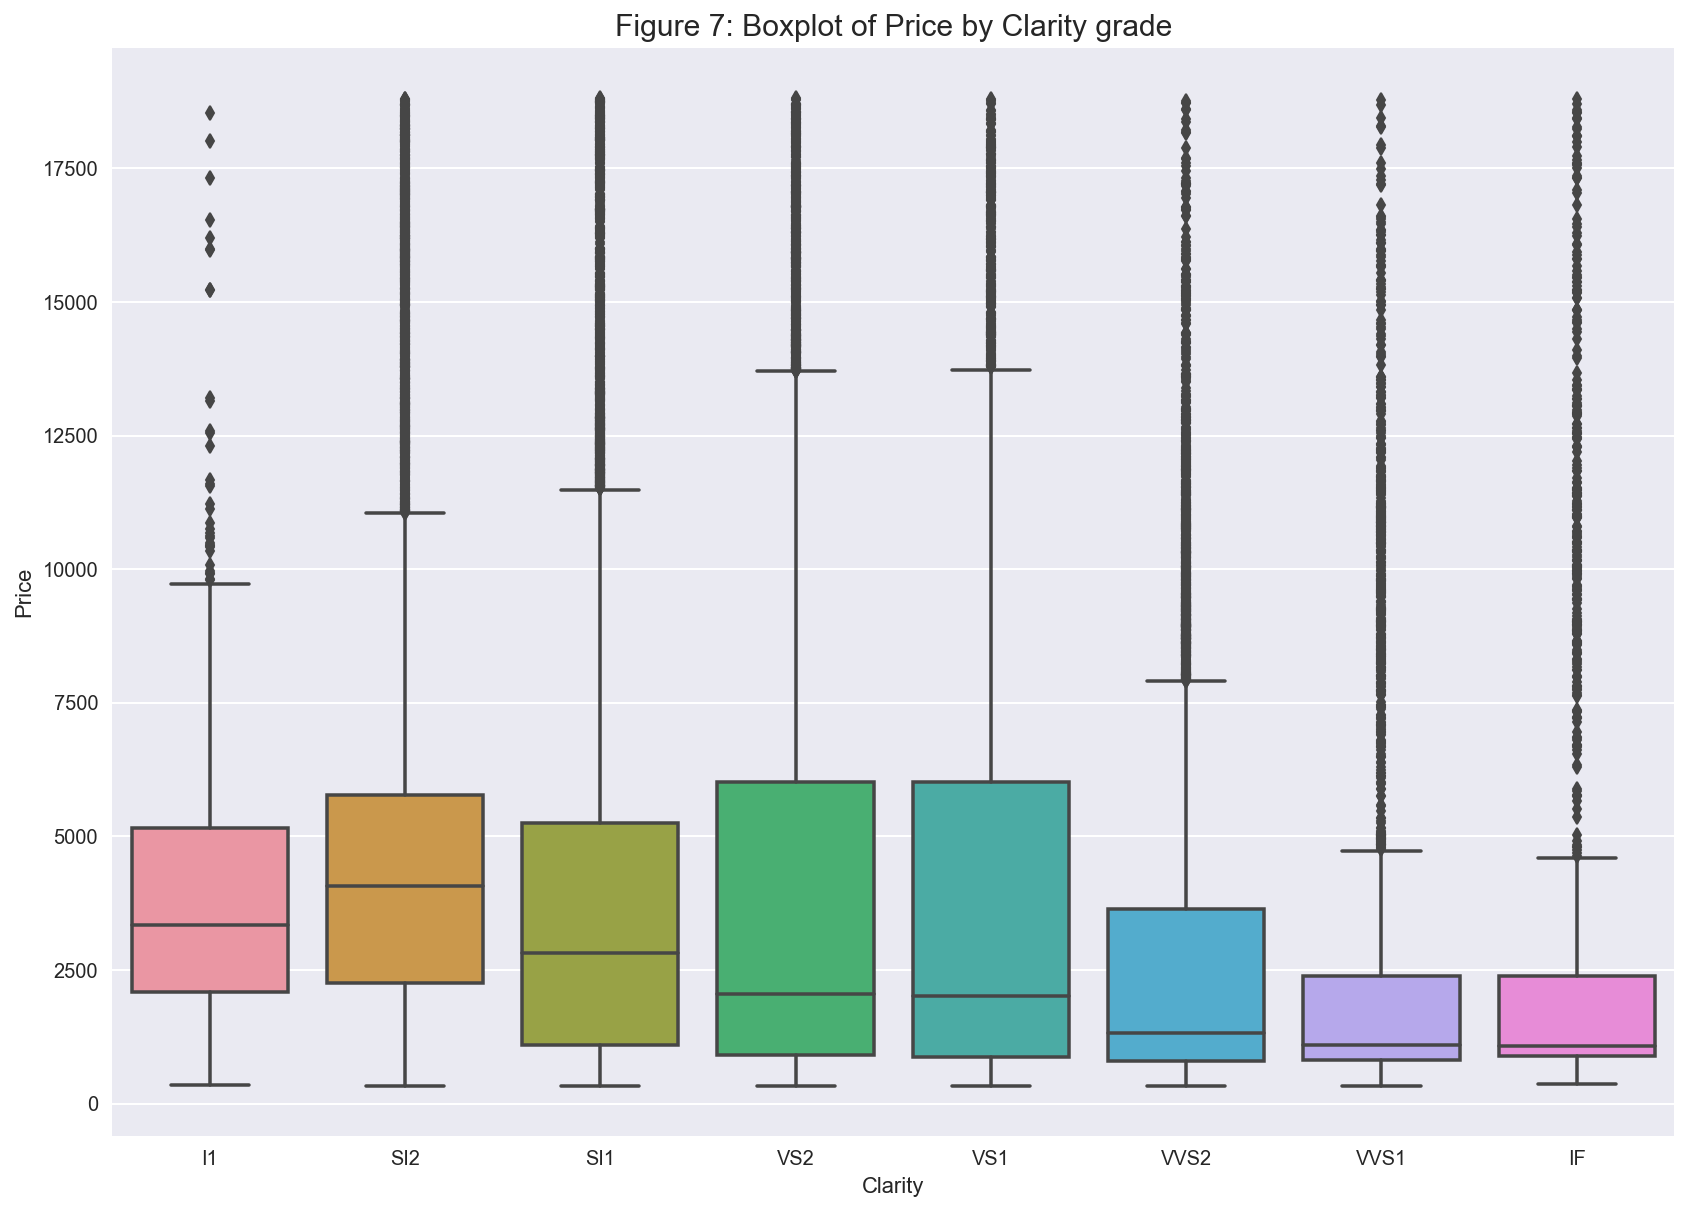

In [43]:
plt.figure(figsize = (14,10))
sns.boxplot(new_diamond_df['Clarity'], new_diamond_df['Price'], order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
plt.title('Figure 7: Boxplot of Price by Clarity grade', fontsize = 15)
plt.show()

#### Boxplot of Cut and price

The boxplot demonstrates the relevant price per cut grade of a diamond. From the results, we can see that while the ranges for all variations are relatively the same, there is a slight increase in price curve as the cut grade increases. This can be deemed to be able to moderately affecty the price

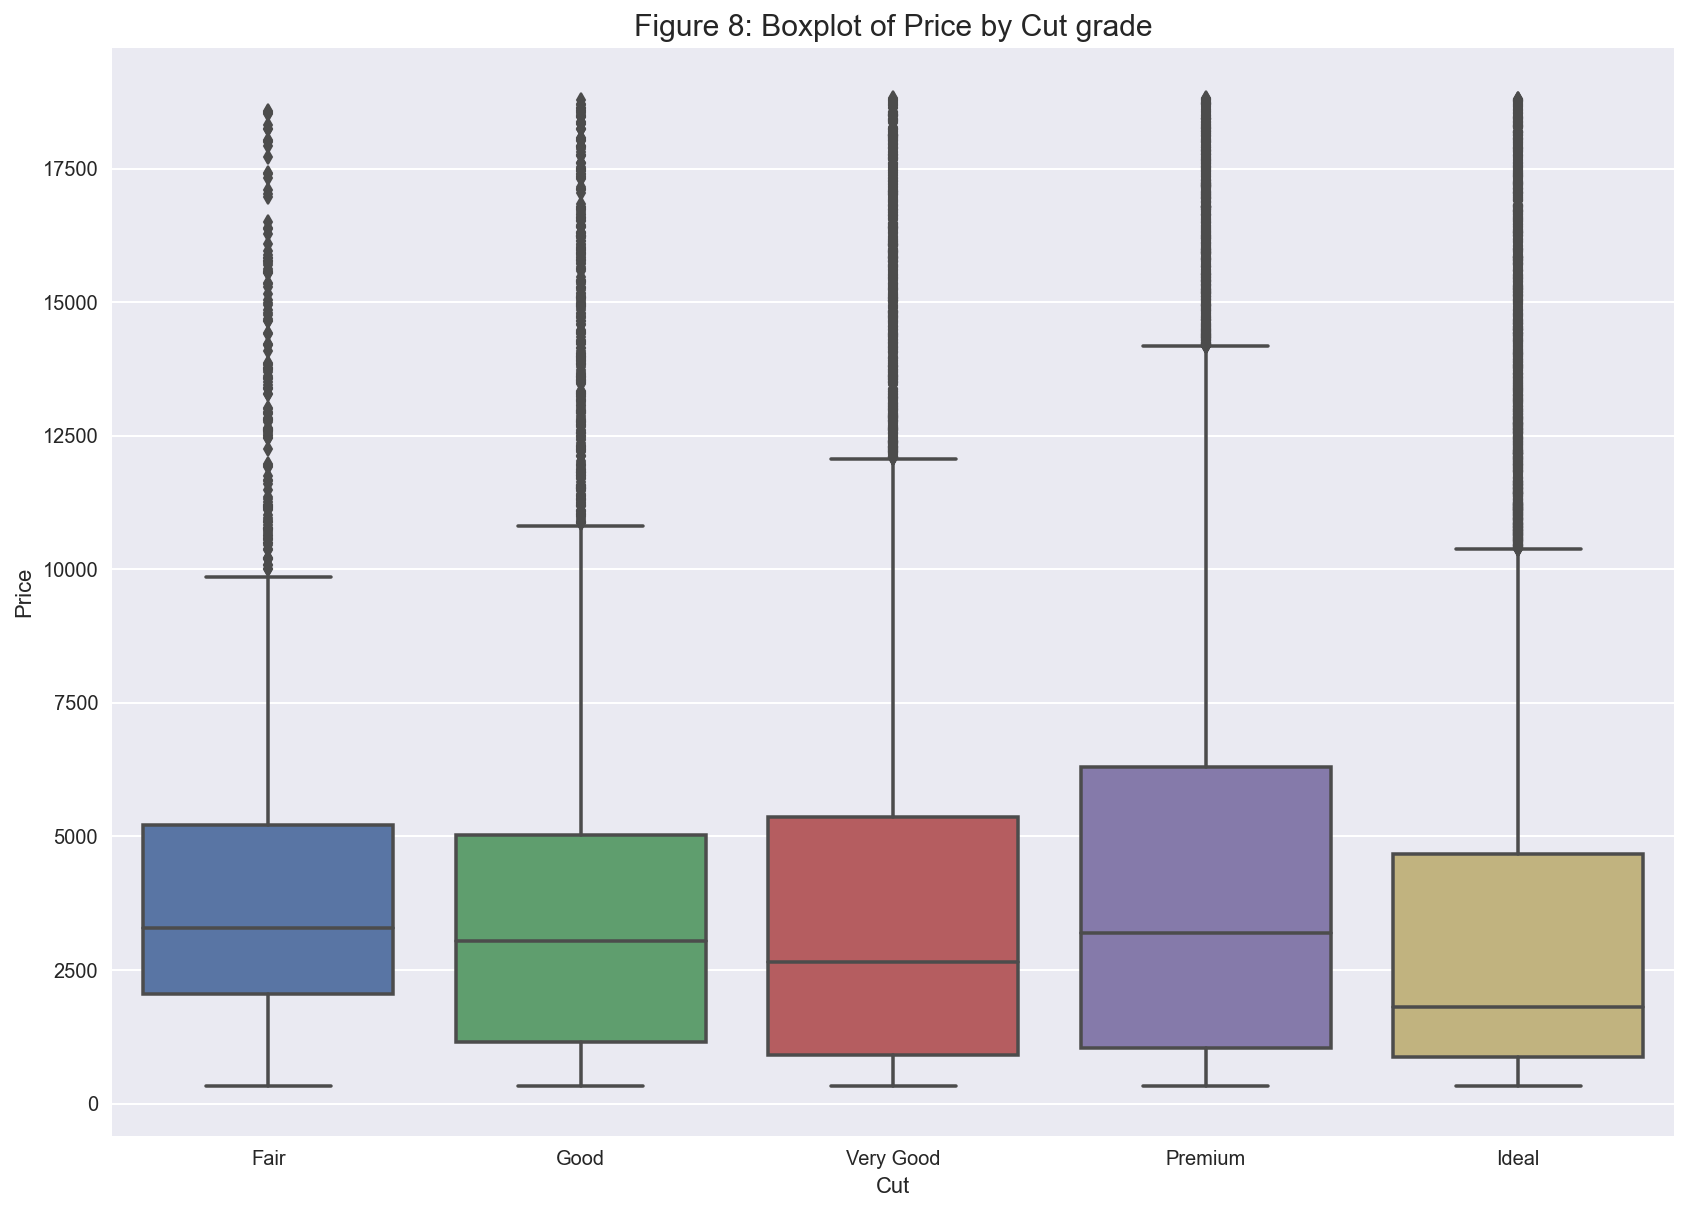

In [44]:
plt.figure(figsize = (14,10))
sns.boxplot(new_diamond_df['Cut'], new_diamond_df['Price'], order=['Fair','Good','Very Good','Premium','Ideal'])
plt.title('Figure 8: Boxplot of Price by Cut grade', fontsize = 15)
plt.show()

#### Boxplot of Color and price

The boxplot demonstrates the relevant price per color gradient of a diamond. From the results, we can observe that it has produced an anomaly, as the classification in real-world subpars it. Thus, we can determine this as being a non complementary result.

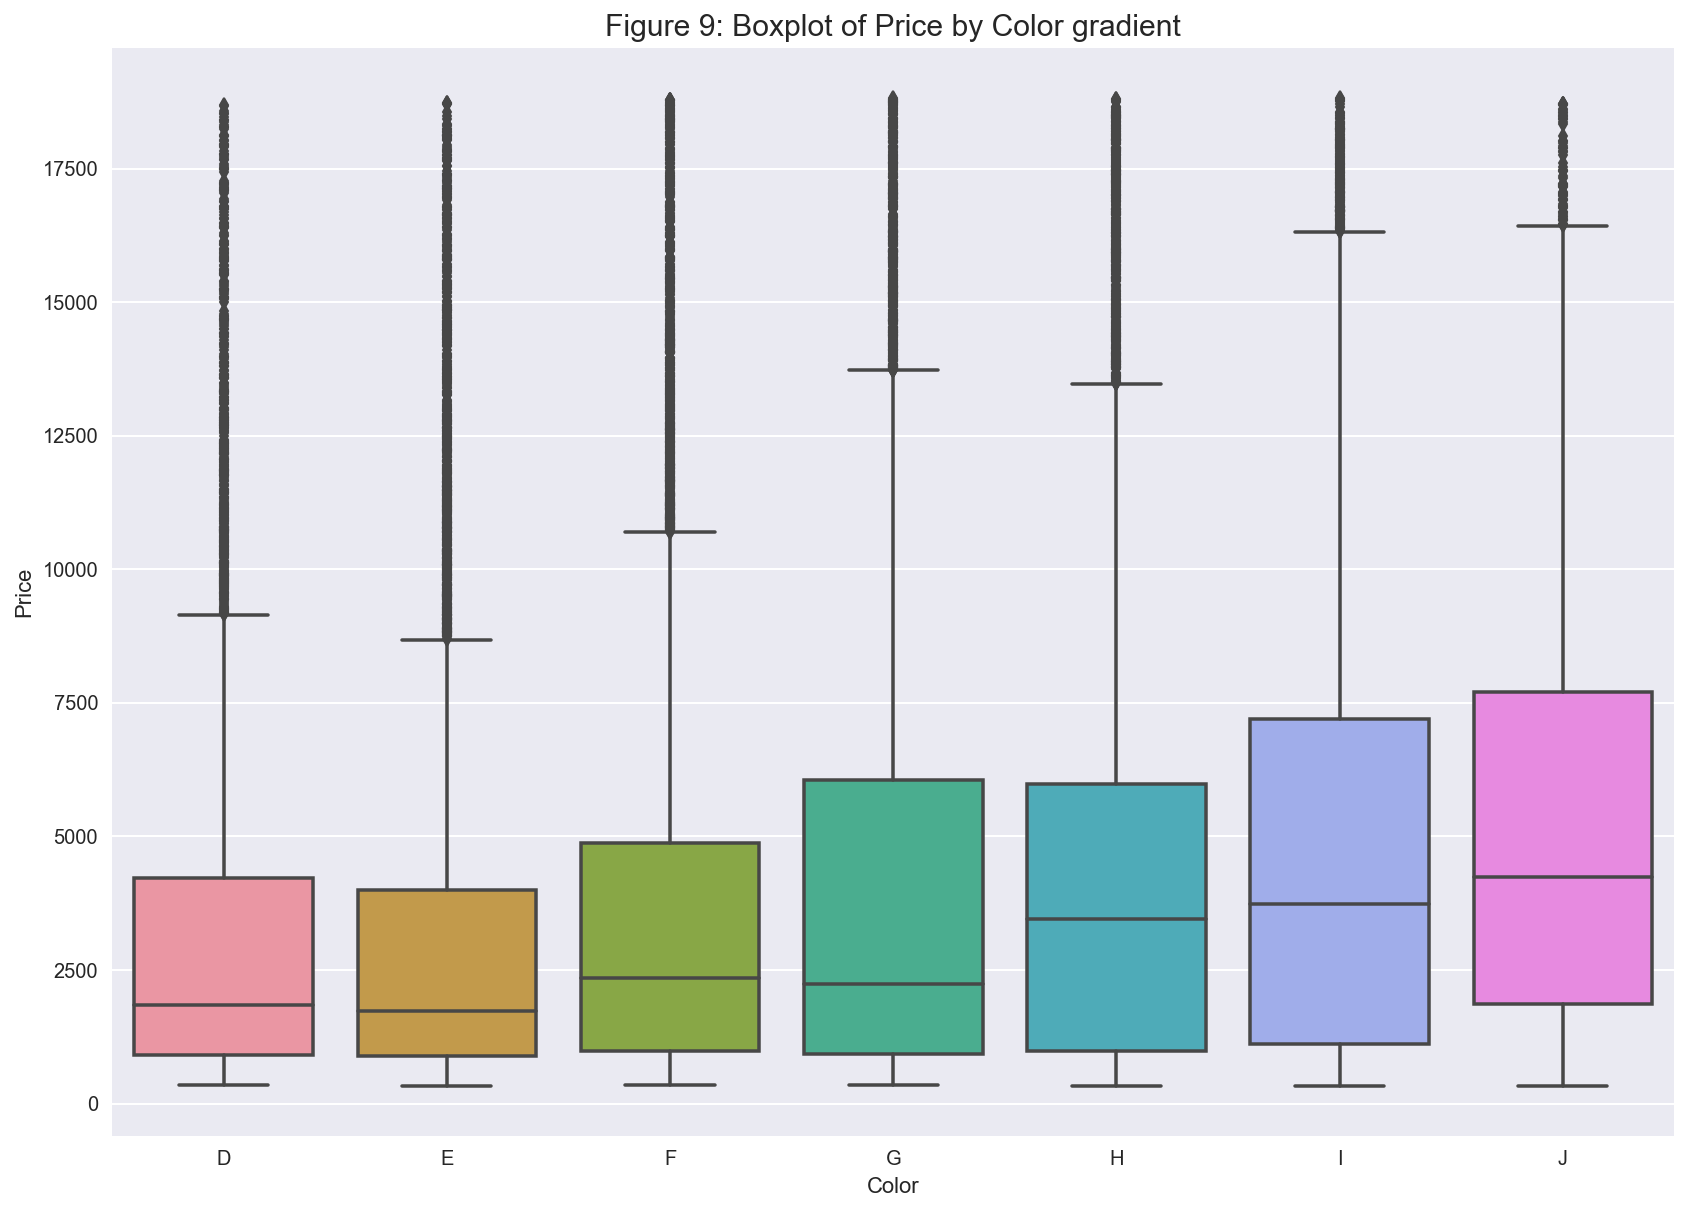

In [45]:
plt.figure(figsize = (14,10))
sns.boxplot(new_diamond_df['Color'], new_diamond_df['Price'], order=['D','E','F','G','H','I','J'])
plt.title('Figure 9: Boxplot of Price by Color gradient', fontsize = 15)
plt.show()

#### Scatterplot of Depth and Price of Diamonds

Figure 10 demonstrates the relevant depth per price of a diamond. If we take a sample from the results, we can see that the price for 60% can have prices from any range available by the dataset. Thus, it indicates that Depth is a completely unrelated variable to calculationg diamond prices.

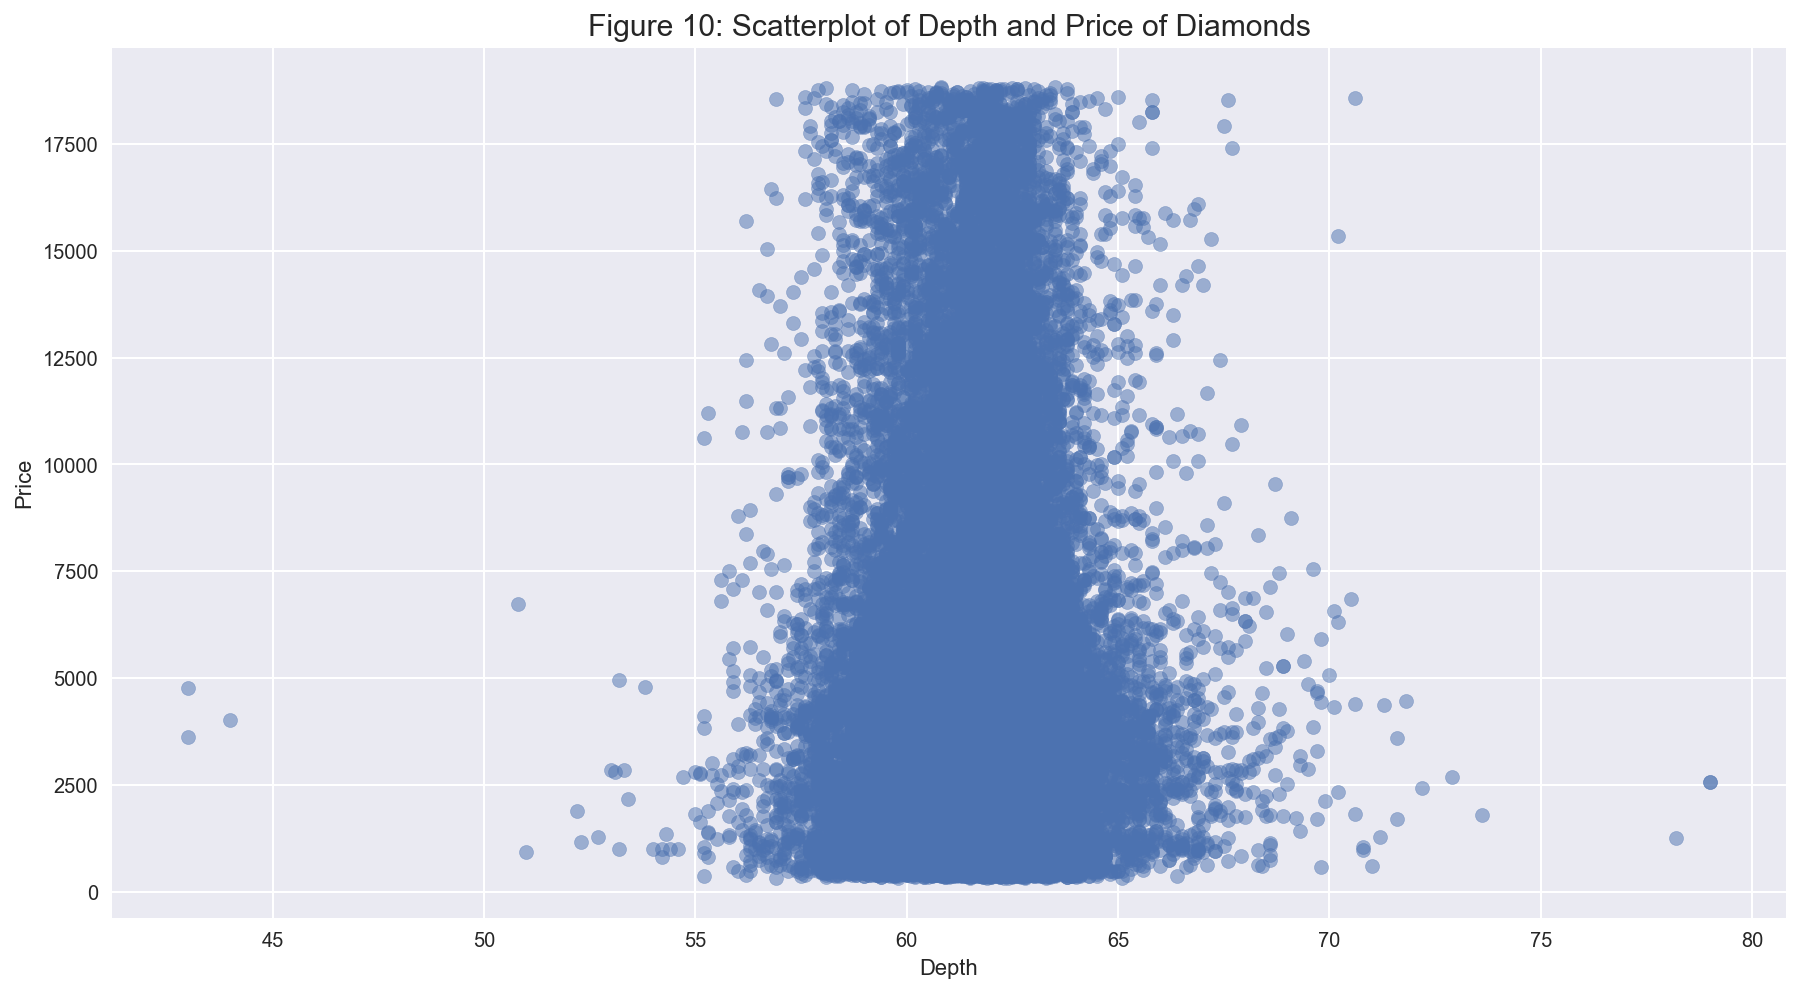

In [46]:
plt.figure(figsize = (15,8))
plt.scatter(new_diamond_df['Depth'], new_diamond_df['Price'], alpha = 0.5)
plt.title('Figure 10: Scatterplot of Depth and Price of Diamonds', fontsize = 15)
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

#### Scatterplot of Table and Price of Diamonds

Figure 11 demonstrates the relevant table per price of a diamond. If we take a sample from the results, identically to the Depth/Price scatterplot results, we can see that the price for 55% can have prices from any range available by the dataset. Thus, it similarly indicates that Table is a completely unrelated variable to calculationg diamond prices.

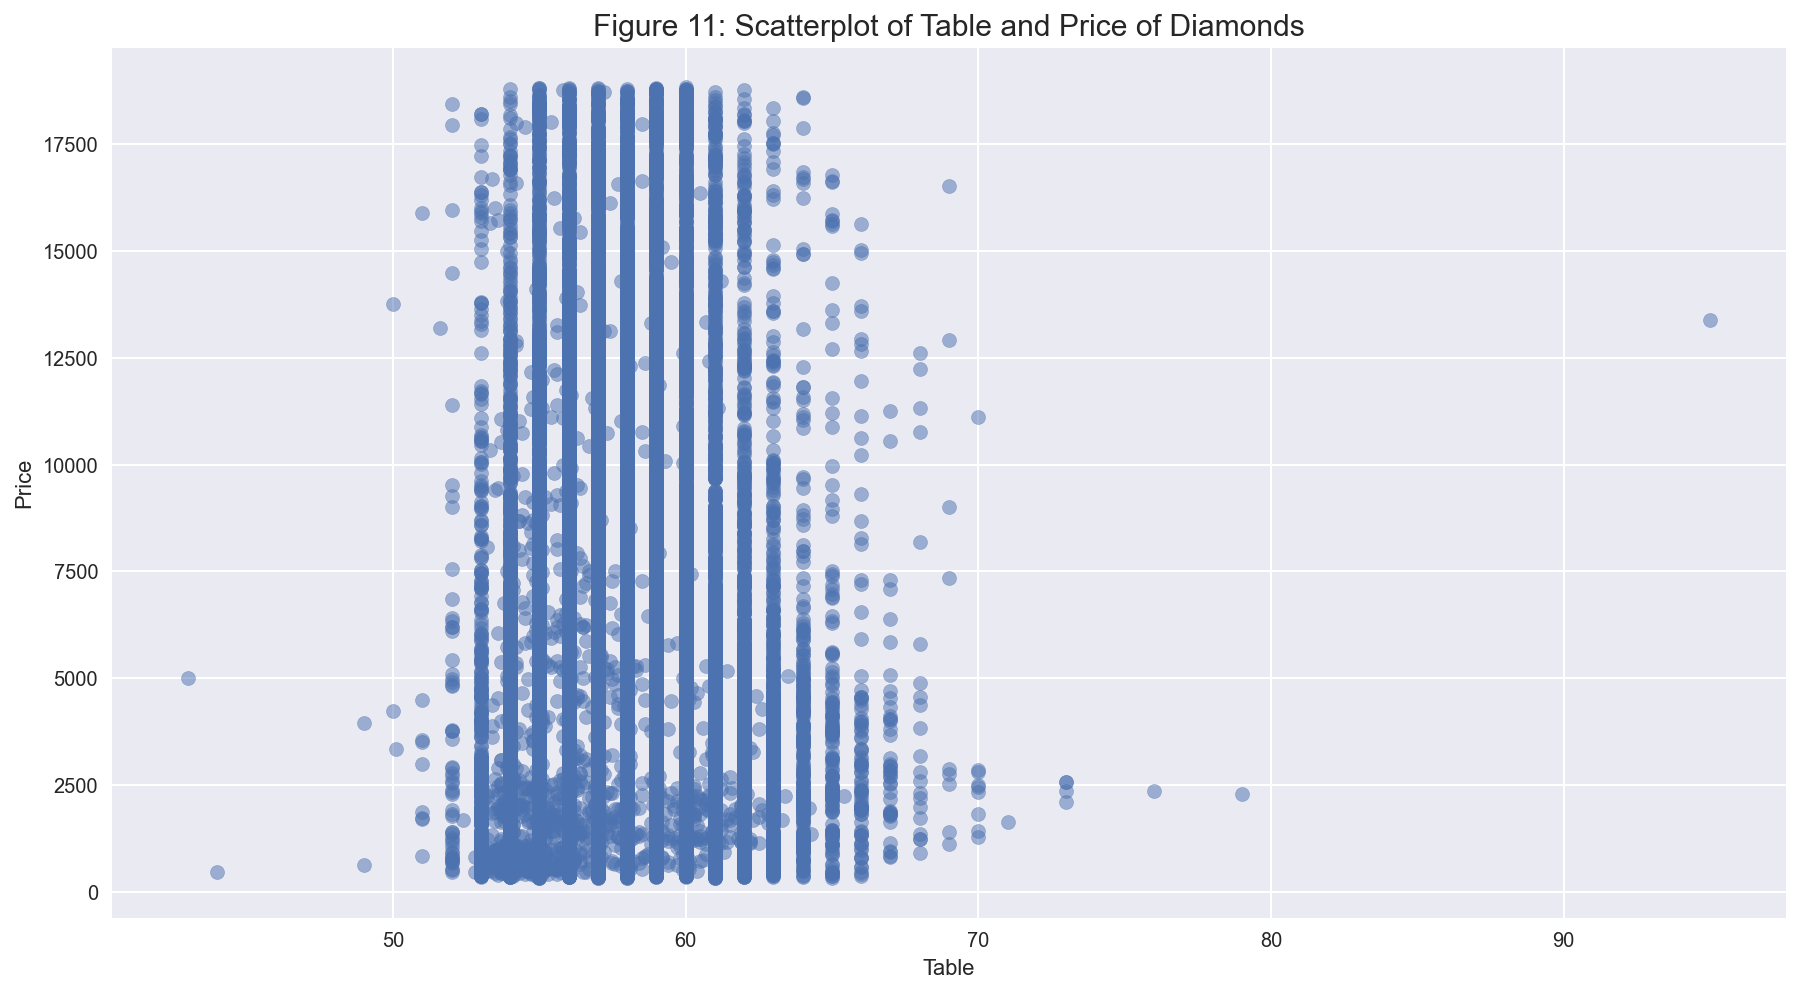

In [47]:
plt.figure(figsize = (15,8))
plt.scatter(new_diamond_df['Table'], new_diamond_df['Price'], alpha = 0.5)
plt.title('Figure 11: Scatterplot of Table and Price of Diamonds', fontsize = 15)
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

#### Scatterplot of Carats and Price of Diamonds

Figure 12 demonstrates the relevant carat per price of a diamond. Observing the data, we can see that there is a clear connection between the increases of the 2 variables, which follows a linear relationship. The following results can be used as a main influencer to finding diamond prices.

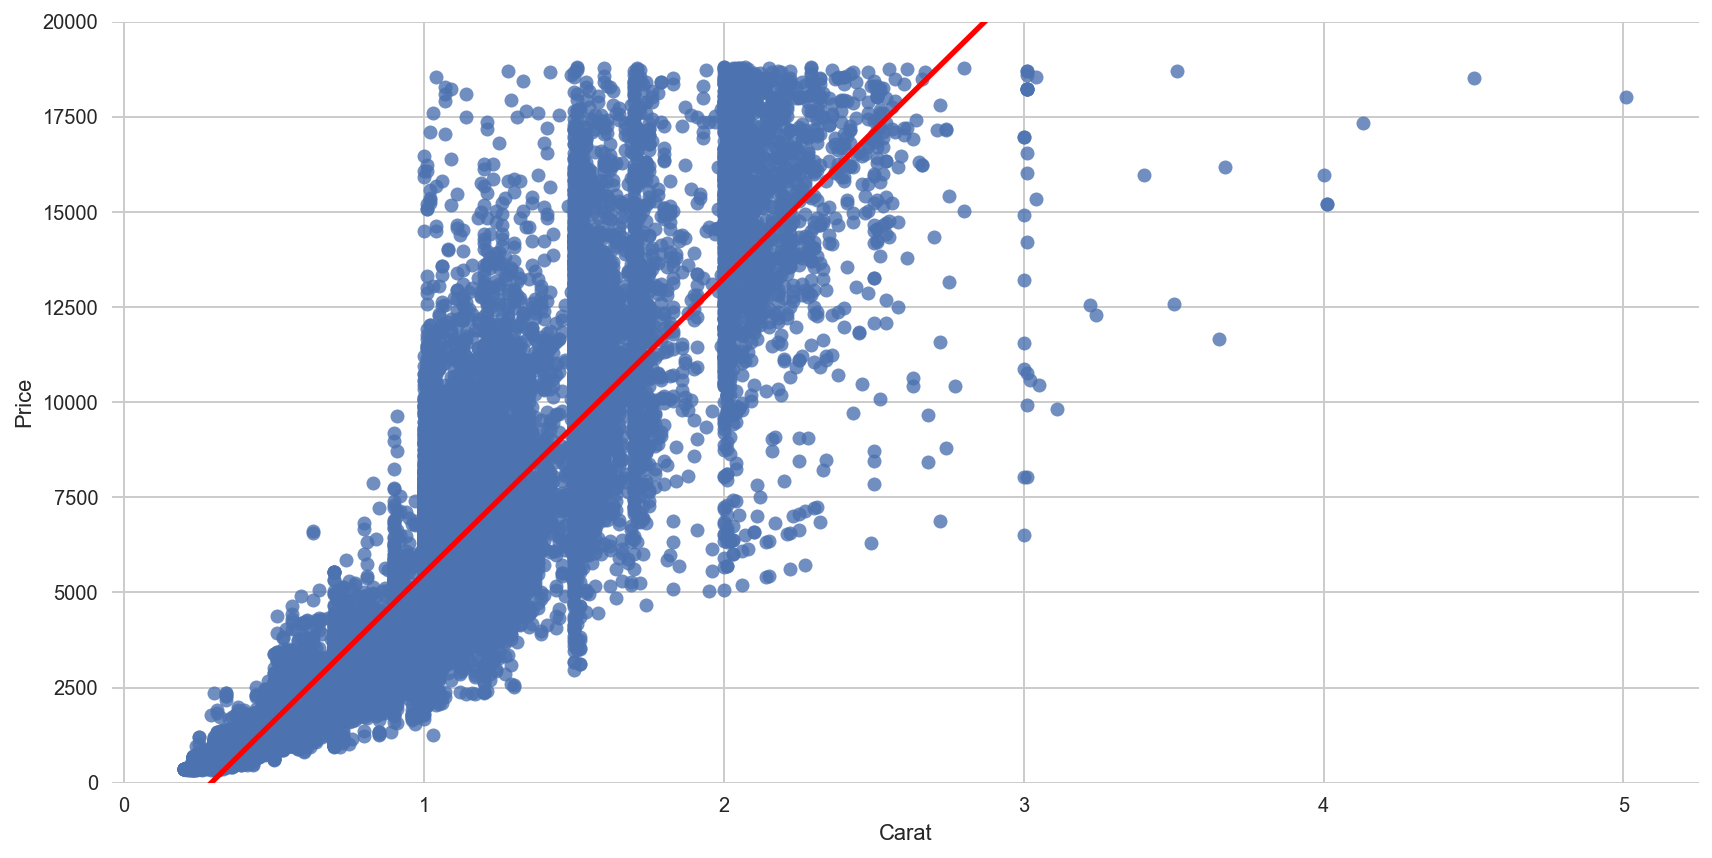

In [48]:
sns.set_style('whitegrid')
sns.lmplot(x ='Carat', y ='Price', data = new_diamond_df, line_kws={'color': 'red'}, height=6, aspect=12/6).set(ylim=(0, 20000))

### Three-Variable Visualisation

## Summary and Conclusions

> YEEEEEEEEEEEEEEE

## References

- Agrawal, S.. Diamonds (Kaggle). Retrieved September 26, 2022 from https://www.kaggle.com/datasets/shivam2503/diamonds